In [2]:
# Import the packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Import the dataset 

In [3]:
df = pd.read_excel(r'C:\Users\Connie Wu\Desktop\Log\Log-2021-11-04.xlsx',sheet_name = 'LOG')
df

,Admin,Ver.,Partial,Date,INT/US,Order Type,Order Qty
0,demon,Ver.05.17,NaN,2019-05-17 11:13:13,INT ORDERS,Bimake,1.0
1,demon,Ver.05.17,NaN,2019-05-17 13:03:09,US ORDERS,Selleck,17.0
2,demon,Ver.05.17,NaN,2019-05-17 15:23:36,US ORDERS,Selleck,39.0
3,demon,Ver.05.17,NaN,2019-05-17 15:30:52,INT ORDERS,Selleck,1.0
4,demon,Ver.05.17,NaN,2019-05-20 09:38:36,US ORDERS,Selleck,32.0
...,...,...,...,...,...,...,...
6012,alice,Ver.01.21,NaN,2021-11-03 14:32:43,US ORDERS,Selleck,3.0
6013,alice,Ver.01.21,NaN,2021-11-03 15:41:44,US ORDERS,Selleck,14.0
6014,alice,Ver.01.21,NaN,2021-11-04 08:47:06,US ORDERS,Selleck,53.0
6015,alice,Ver.01.21,NaN,2021-11-04 09:04:47,INT ORDERS,Selleck,1.0


In [4]:
# There are 5070 rows and 7 columns in the dataset 

df.shape

(6017, 7)

In [5]:
# the useful information were on the columns of 'Date', 'INT/US','Order Type','Order Qty', so subset the columns mentioned. 

df = df[['Date', 'INT/US','Order Type','Order Qty']]
df

,Date,INT/US,Order Type,Order Qty
0,2019-05-17 11:13:13,INT ORDERS,Bimake,1.0
1,2019-05-17 13:03:09,US ORDERS,Selleck,17.0
2,2019-05-17 15:23:36,US ORDERS,Selleck,39.0
3,2019-05-17 15:30:52,INT ORDERS,Selleck,1.0
4,2019-05-20 09:38:36,US ORDERS,Selleck,32.0
...,...,...,...,...
6012,2021-11-03 14:32:43,US ORDERS,Selleck,3.0
6013,2021-11-03 15:41:44,US ORDERS,Selleck,14.0
6014,2021-11-04 08:47:06,US ORDERS,Selleck,53.0
6015,2021-11-04 09:04:47,INT ORDERS,Selleck,1.0


In [6]:
# Understand the data types of the coloumns 
df.dtypes

Date          datetime64[ns]
INT/US                object
Order Type            object
Order Qty            float64
dtype: object

In [7]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

<ipython-input-7-5b2d7bb9022f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.DatetimeIndex(df['Date']).year


,Date,INT/US,Order Type,Order Qty,Year
0,2019-05-17 11:13:13,INT ORDERS,Bimake,1.0,2019
1,2019-05-17 13:03:09,US ORDERS,Selleck,17.0,2019
2,2019-05-17 15:23:36,US ORDERS,Selleck,39.0,2019
3,2019-05-17 15:30:52,INT ORDERS,Selleck,1.0,2019
4,2019-05-20 09:38:36,US ORDERS,Selleck,32.0,2019
...,...,...,...,...,...
6012,2021-11-03 14:32:43,US ORDERS,Selleck,3.0,2021
6013,2021-11-03 15:41:44,US ORDERS,Selleck,14.0,2021
6014,2021-11-04 08:47:06,US ORDERS,Selleck,53.0,2021
6015,2021-11-04 09:04:47,INT ORDERS,Selleck,1.0,2021


In [8]:
# Create a column containing month information for further analysis

df['Month'] = pd.DatetimeIndex(df['Date']).month
df 

<ipython-input-8-20f86bc0a742>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.DatetimeIndex(df['Date']).month


,Date,INT/US,Order Type,Order Qty,Year,Month
0,2019-05-17 11:13:13,INT ORDERS,Bimake,1.0,2019,5
1,2019-05-17 13:03:09,US ORDERS,Selleck,17.0,2019,5
2,2019-05-17 15:23:36,US ORDERS,Selleck,39.0,2019,5
3,2019-05-17 15:30:52,INT ORDERS,Selleck,1.0,2019,5
4,2019-05-20 09:38:36,US ORDERS,Selleck,32.0,2019,5
...,...,...,...,...,...,...
6012,2021-11-03 14:32:43,US ORDERS,Selleck,3.0,2021,11
6013,2021-11-03 15:41:44,US ORDERS,Selleck,14.0,2021,11
6014,2021-11-04 08:47:06,US ORDERS,Selleck,53.0,2021,11
6015,2021-11-04 09:04:47,INT ORDERS,Selleck,1.0,2021,11


# Subset Selleck Order 

In [9]:
# subset the dataset only containing the order Type of "Selleck", there are total 4099 times order processing of 'Selleck'
df_selleck = df[df['Order Type']=='Selleck']
df_selleck.shape

(5247, 6)

In [10]:
# count how many time the shipping department would process the order in one day

df_selleck['Order Qty'].groupby(df['Date'].dt.to_period('D')).count()

Date
2019-05-17     3
2019-05-20     5
2019-05-21     4
2019-05-22     8
2019-05-23     5
              ..
2021-10-29    11
2021-11-01    10
2021-11-02     9
2021-11-03     8
2021-11-04     3
Freq: D, Name: Order Qty, Length: 620, dtype: int64

# The number of the orders receiving

### 每一天的收到的订单数量

<AxesSubplot:title={'center':'The number of orders receiving everyday'}, xlabel='Date'>

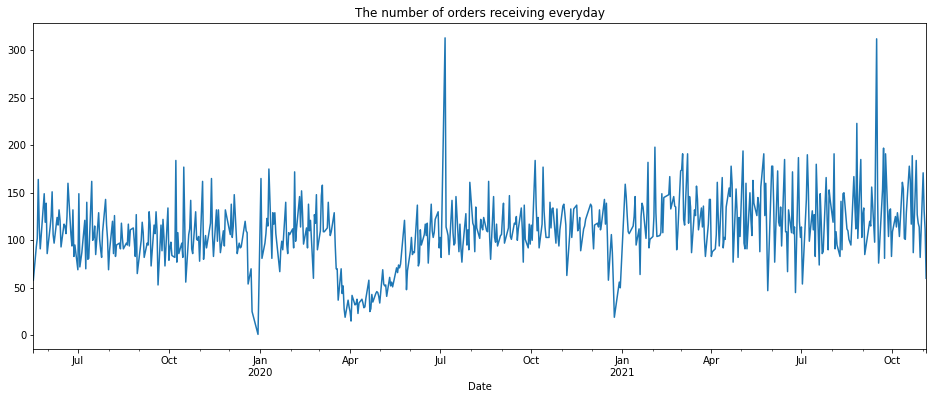

In [11]:

df['Order Qty'].groupby(df['Date'].dt.to_period('D')).sum().plot(figsize=(16,6),title = 'The number of orders receiving everyday')

<AxesSubplot:title={'center':'The number of orders receiving everyday'}, xlabel='Date'>

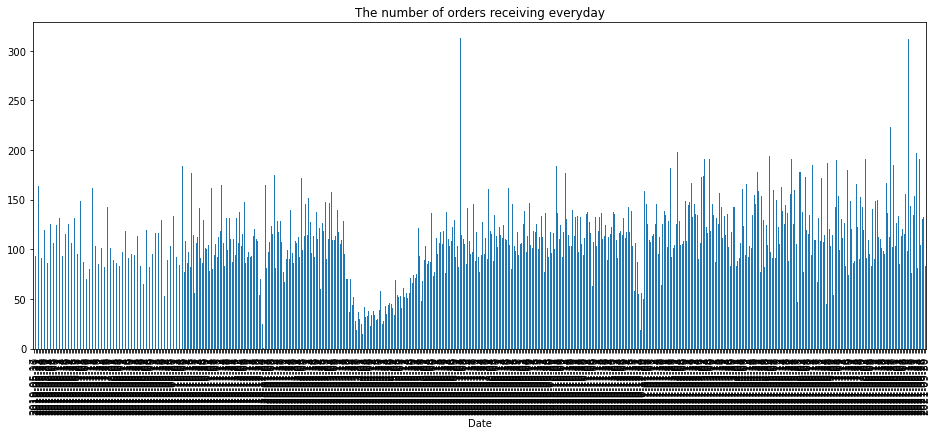

In [15]:
df['Order Qty'].groupby(df['Date'].dt.to_period('D')).sum().plot(kind='bar',figsize=(16,6),title = 'The number of orders receiving everyday')

### 每一周的收到的订单数量

<AxesSubplot:title={'center':'The number of order receiving by shipping Dept by week'}, xlabel='Date'>

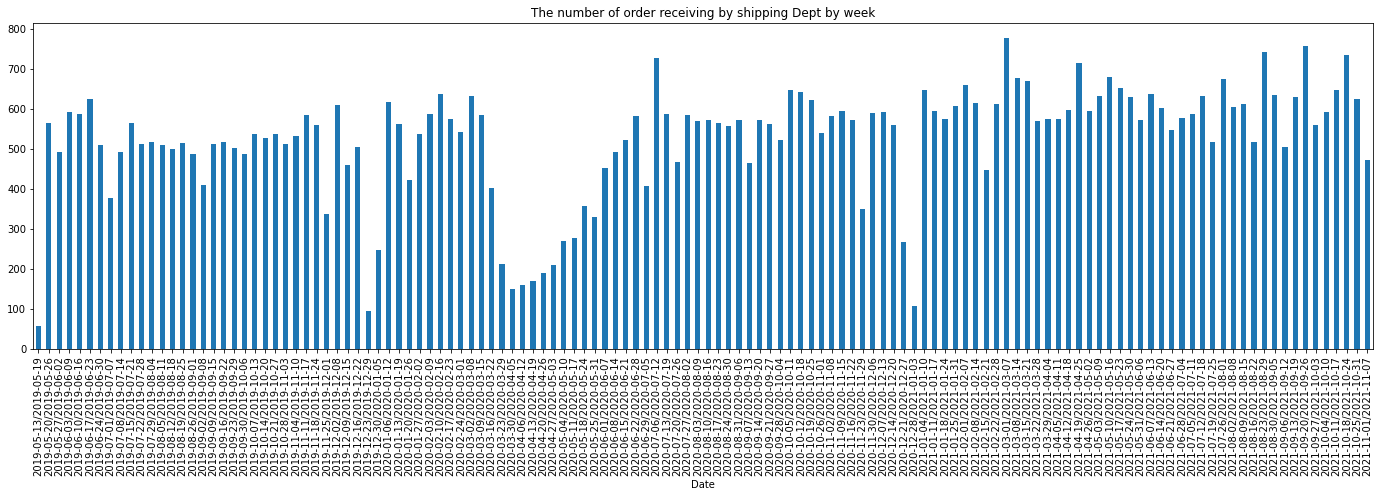

In [12]:
df['Order Qty'].groupby(df['Date'].dt.to_period('W')).sum().plot(kind='bar',figsize=(24,6), title ='The number of order receiving by shipping Dept by week')

### The below barplot shows the number of order receiving in the shipping department 
### 每个月的收到的订单数量 

<AxesSubplot:title={'center':'The number of order receiving by shipping Dept by month'}, xlabel='Date'>

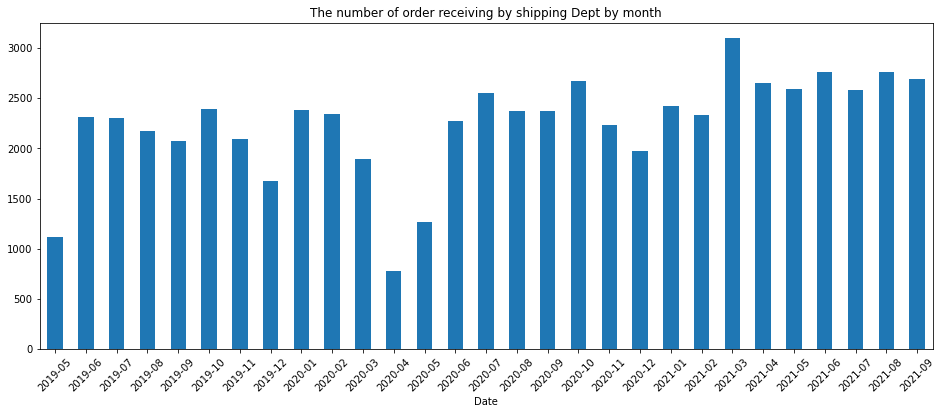

In [16]:
df['Order Qty'].groupby(df['Date'].dt.to_period('M')).sum().plot(kind='bar',figsize=(16,6), title ='The number of order receiving by shipping Dept by month',rot=45)

In [13]:
df_month = pd.DataFrame(df['Order Qty'].groupby(df['Date'].dt.to_period('M')).sum())
df_month = df_month.reset_index()
df_month.columns

Index(['Date', 'Order Qty'], dtype='object')

In [14]:
df_month.dtypes

Date         period[M]
Order Qty      float64
dtype: object

In [15]:
df_month['Date'] = df_month['Date'].dt.strftime('%Y-%m').add('-01 00:00:00.000')

In [16]:
df_month['month'] = pd.DatetimeIndex(df_month['Date']).month
df_month['year'] = pd.DatetimeIndex(df_month['Date']).year
df_month

,Date,Order Qty,month,year
0,2019-05-01 00:00:00.000,1115.0,5,2019
1,2019-06-01 00:00:00.000,2313.0,6,2019
2,2019-07-01 00:00:00.000,2305.0,7,2019
3,2019-08-01 00:00:00.000,2168.0,8,2019
4,2019-09-01 00:00:00.000,2073.0,9,2019
5,2019-10-01 00:00:00.000,2388.0,10,2019
6,2019-11-01 00:00:00.000,2091.0,11,2019
7,2019-12-01 00:00:00.000,1671.0,12,2019
8,2020-01-01 00:00:00.000,2385.0,1,2020
9,2020-02-01 00:00:00.000,2341.0,2,2020


In [17]:
df_month_pivoted = df_month[df_month['year']< 2022].pivot(index='month', columns='year', values='Order Qty')
df_month_pivoted

year,2019,2020,2021
month,,,
1,NaN,2385.0,2422.0
2,NaN,2341.0,2336.0
3,NaN,1898.0,3094.0
4,NaN,777.0,2652.0
5,1115.0,1266.0,2593.0
6,2313.0,2270.0,2765.0
7,2305.0,2553.0,2577.0
8,2168.0,2370.0,2763.0
9,2073.0,2370.0,2689.0


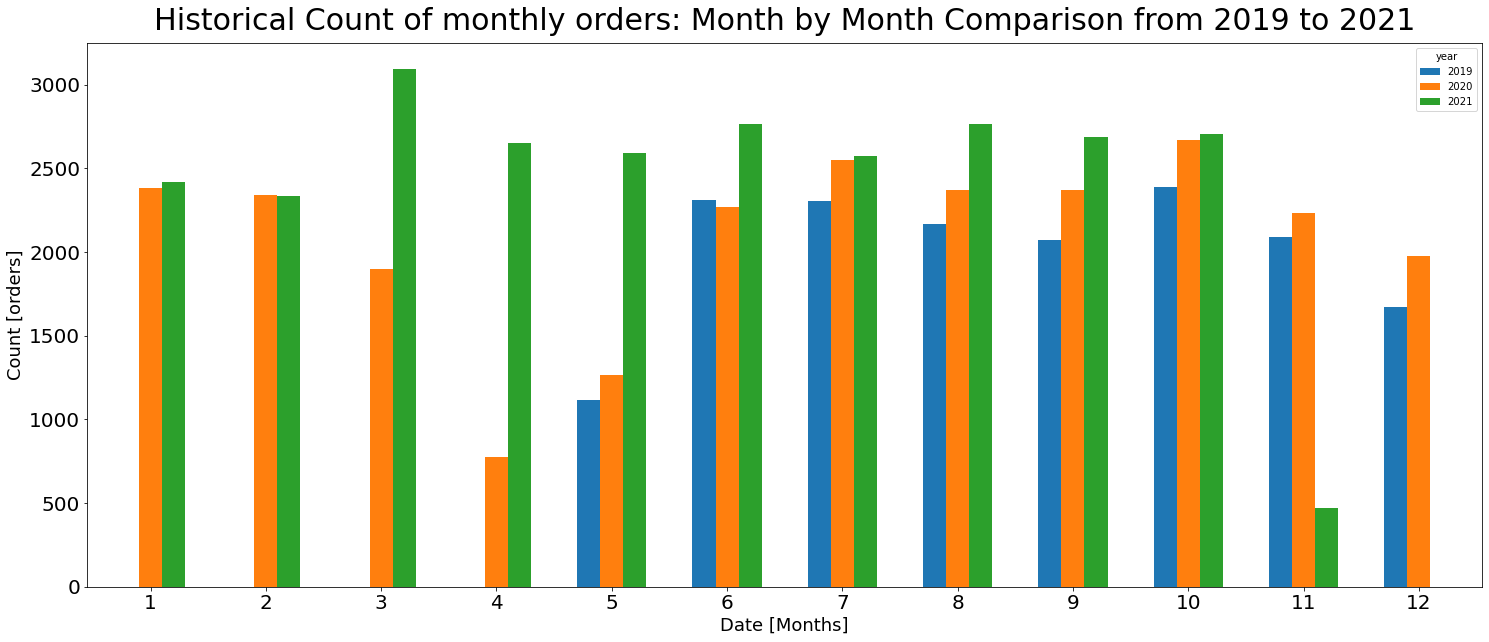

In [18]:
df_month_pivoted.plot(kind='bar',width=0.6, figsize=(25, 10), rot=0) 
plt.title("Historical Count of monthly orders: Month by Month Comparison from 2019 to 2021", y=1.013, fontsize=30)
plt.xlabel("Date [Months]", fontsize=18)
plt.ylabel("Count [orders]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Shipping department process order

### Plot show how many times that the shipping department would process the order in one day. Generally speaking, there is a slightly increased trends. The most two lowest points in the plots were around Christmas. 

###  每天的做单次数

<AxesSubplot:title={'center':'The times processing order everyday'}, xlabel='Date'>

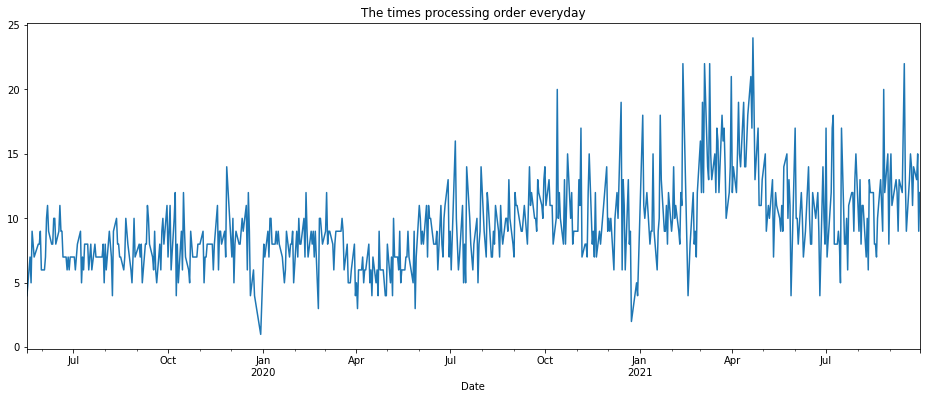

In [24]:

df['Order Qty'].groupby(df['Date'].dt.to_period('D')).count().plot(figsize=(16,6),title = 'The times processing order everyday')

#### Around the Apr2020 to Jun2020, the sum of order processed decrease due to in the beginning of Covi-19, but the number of  the order recover on Jul 2020 and one of the day in Jul 2020 reached to 300. Meanwhile, there are two lowest point around thanksgiving and Christmas holiday on 2019 and 2020.

### The below barplot shows how many times the order had been processed in the shipping department each week. 
### Shipping department 每周的做单数量

<AxesSubplot:xlabel='Date'>

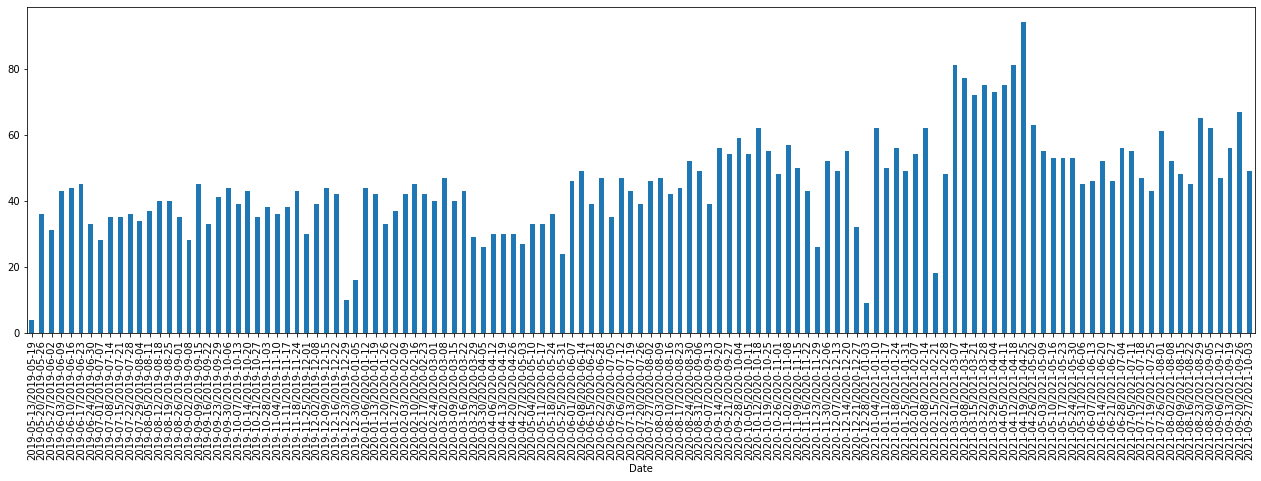

In [25]:

df['Order Qty'].groupby(df['Date'].dt.to_period('W')).count().plot(kind='bar',figsize=(22,6))

### The below barplot shows how many times the order had been processed in the shipping department each month. There are two peaks on Mar 2021 and Apr 2021. 
### Shipping department 每月的做单数量

<AxesSubplot:title={'center':'The times Shipping Dept process orders'}, xlabel='Date'>

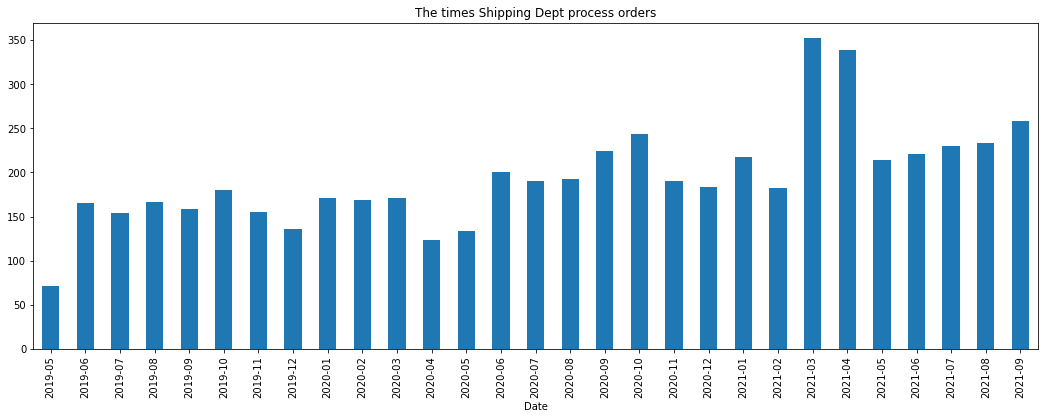

In [26]:

df['Order Qty'].groupby(df['Date'].dt.to_period('M')).count().plot(kind='bar',figsize=(18,6), title = 'The times Shipping Dept process orders')

# Selleck International order

In [27]:
df_Selleck_INT = df_selleck[df_selleck['INT/US']=='INT ORDERS']
df_Selleck_INT

,Date,INT/US,Order Type,Order Qty,Year,Month
3,2019-05-17 15:30:52,INT ORDERS,Selleck,1.0,2019,5
6,2019-05-20 13:03:46,INT ORDERS,Selleck,1.0,2019,5
9,2019-05-20 14:55:12,INT ORDERS,Selleck,2.0,2019,5
12,2019-05-21 10:58:36,INT ORDERS,Selleck,NaN,2019,5
15,2019-05-21 15:02:37,INT ORDERS,Selleck,4.0,2019,5
...,...,...,...,...,...,...
5692,2021-09-29 09:27:12,INT ORDERS,Selleck,1.0,2021,9
5700,2021-09-30 09:44:26,INT ORDERS,Selleck,1.0,2021,9
5703,2021-09-30 11:30:34,INT ORDERS,Selleck,1.0,2021,9
5708,2021-09-30 14:34:10,INT ORDERS,Selleck,1.0,2021,9


<AxesSubplot:xlabel='Date'>

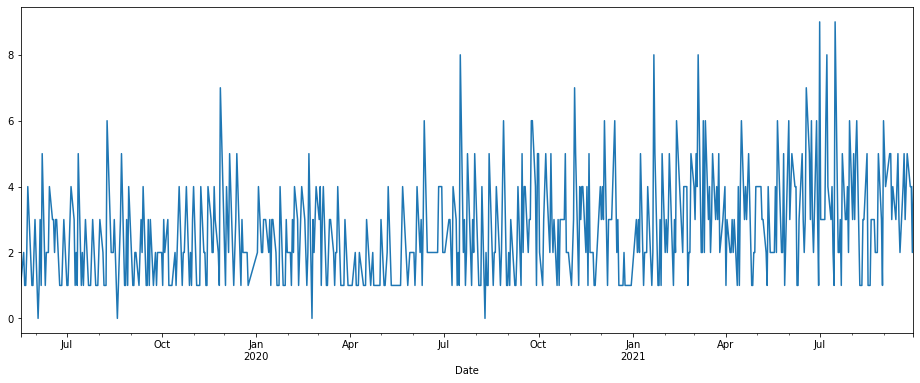

In [28]:
df_Selleck_INT['Order Qty'].groupby(df_Selleck_INT['Date'].dt.to_period('D')).count().plot(figsize = (16,6)) 

In [29]:
### There is a slightly increased trend to process the international orders

<AxesSubplot:title={'center':'Times processing international orders in monthly'}, xlabel='Date'>

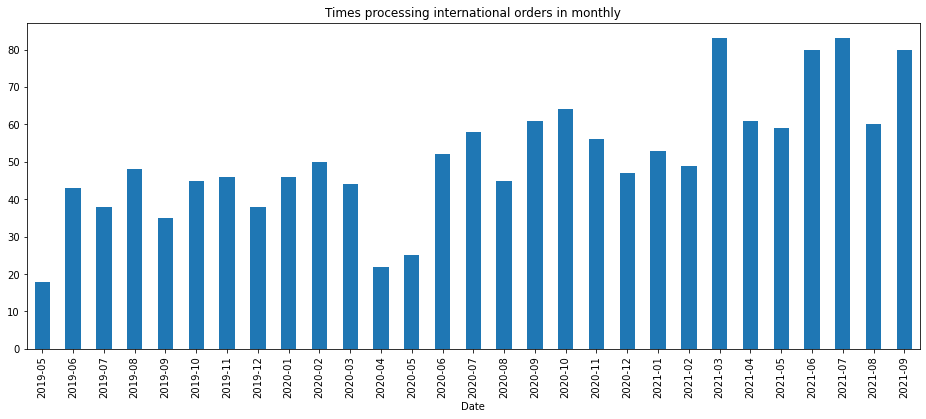

In [30]:
df_Selleck_INT['Order Qty'].groupby(df_Selleck_INT['Date'].dt.to_period('M')).count().plot(
    kind = 'bar', figsize = (16,6), title ='Times processing international orders in monthly') 

### During Dec 2019, Dec2020 and in the beginning of the Covid-19, there were some lower points.

<AxesSubplot:title={'center':'The number of the international order receiving in month'}, xlabel='Date'>

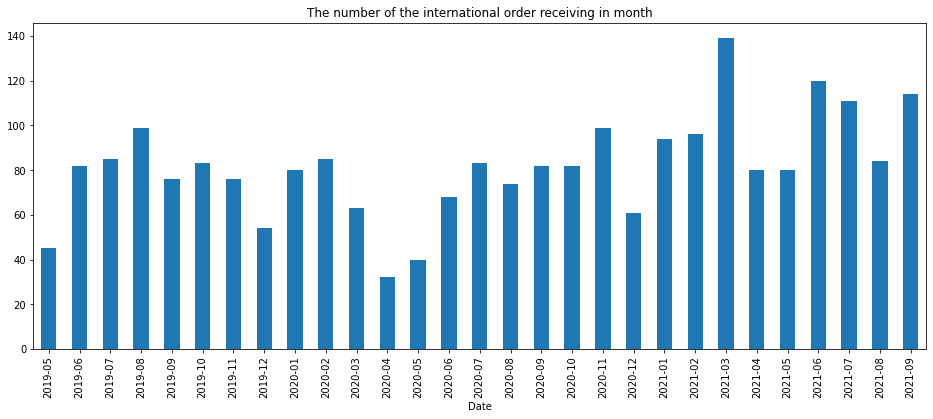

In [31]:
df_Selleck_INT['Order Qty'].groupby(df_Selleck_INT['Date'].dt.to_period('M')).sum().plot(
    kind = 'bar', figsize = (16,6), title ='The number of the international order receiving in month') 

<AxesSubplot:title={'center':'The average number of the internation order receiving in quater'}, xlabel='Date'>

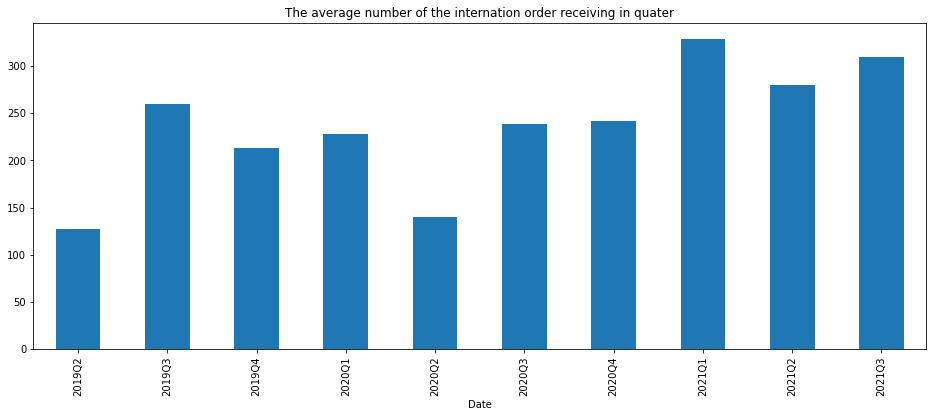

In [32]:
df_Selleck_INT['Order Qty'].groupby(df_Selleck_INT['Date'].dt.to_period('Q')).sum().plot(
    kind = 'bar', figsize = (16,6), title ='The average number of the internation order receiving in quater') 

## Bimake 

In [34]:
df_bimake = df[df['Order Type']=='Bimake']
df_bimake

,Date,INT/US,Order Type,Order Qty,Year,Month
0,2019-05-17 11:13:13,INT ORDERS,Bimake,1.0,2019,5
5,2019-05-20 10:05:05,US ORDERS,Bimake,5.0,2019,5
8,2019-05-20 14:16:14,US ORDERS,Bimake,1.0,2019,5
13,2019-05-21 13:39:30,US ORDERS,Bimake,3.0,2019,5
21,2019-05-22 13:58:07,US ORDERS,Bimake,4.0,2019,5
...,...,...,...,...,...,...
5671,2021-09-27 13:42:58,US ORDERS,Bimake,1.0,2021,9
5676,2021-09-28 08:59:54,US ORDERS,Bimake,1.0,2021,9
5687,2021-09-28 14:41:03,INT ORDERS,Bimake,1.0,2021,9
5696,2021-09-29 14:03:06,US ORDERS,Bimake,3.0,2021,9


### The below barplot shows the number the order receiving per month in Bimake brand 

<AxesSubplot:xlabel='Date'>

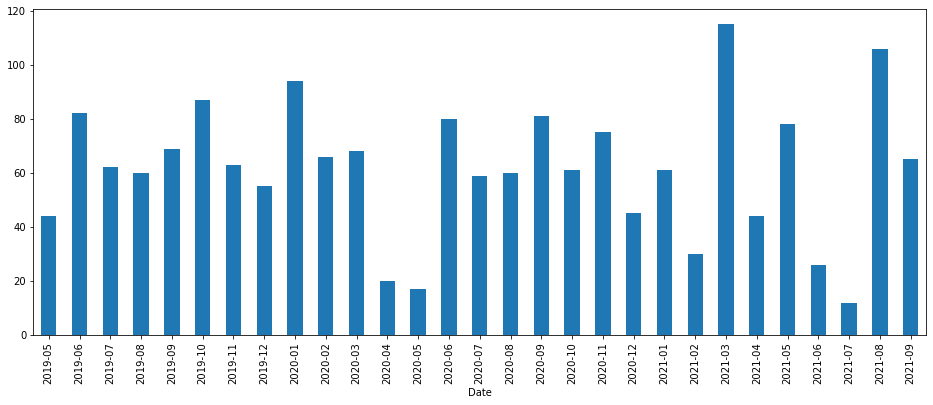

In [35]:
df_bimake['Order Qty'].groupby(df_bimake['Date'].dt.to_period('M')).sum().plot(kind='bar',figsize=(16,6))